## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer") 

# Display the data table for preview
mouse_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count=mouse_combined["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=mouse_combined[["Mouse ID", "Timepoint"]].duplicated
print(duplicates)

<bound method DataFrame.duplicated of      Mouse ID  Timepoint
0        k403          0
1        k403          5
2        k403         10
3        k403         15
4        k403         20
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1893 rows x 2 columns]>


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_all=mouse_combined.duplicated
print(duplicates_all)


<bound method DataFrame.duplicated of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.8

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop duplicates 
mouse_combined_clean=mouse_combined.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_b=mouse_combined_clean["Mouse ID"].nunique()
mouse_count_b

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate 
#the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_mean
drug_median=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_median
drug_var=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_var
drug_std=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_std
drug_SEM=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_SEM
# Assemble the resulting series into a single summary dataframe.
tumor_stat= pd.DataFrame({"Mean": drug_mean, "Median":drug_median, "Variance": drug_var,
            "Standard Deviation":drug_std, "SEM": drug_SEM})

tumor_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_stats=mouse_combined_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_drug_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

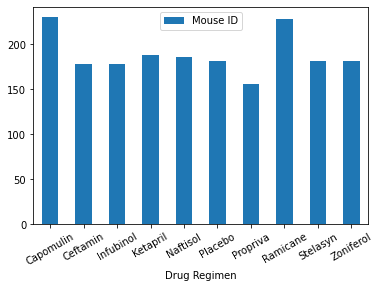

In [83]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#number of unique mice per each drug regimen. 

regimen_mouse_count.plot.bar(x="Drug Regimen", y= "Mouse ID", rot=30)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

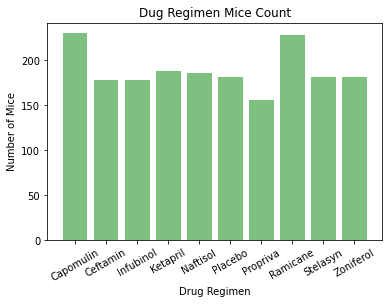

In [77]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

regimen_mouse_count=pd.DataFrame(mouse_combined_clean.groupby(by="Drug Regimen")["Mouse ID"].count()).reset_index()
plt.bar(regimen_mouse_count["Drug Regimen"], regimen_mouse_count["Mouse ID"],color='g', alpha=.5, align="center")
plt.title("Dug Regimen Mice Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=30, horizontalalignment="center")


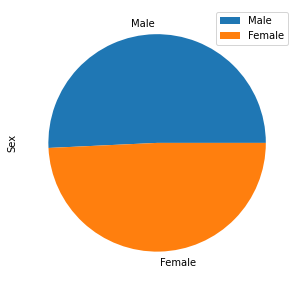

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_mouse_count.plot.pie(y="Sex", figsize=(5, 5), labels=sex_mouse_count["index"], )


([<matplotlib.patches.Wedge at 0x7fdbb6701460>,
 [Text(-0.6872462450269542, -0.8588903298421469, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.37486158819652043, -0.46848563445935276, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

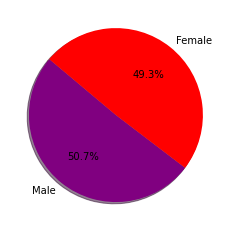

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#want total female and male numbers in sex_count


sex_mouse_count=pd.DataFrame(mouse_combined_clean["Sex"].value_counts()).reset_index()

labels= sex_mouse_count["index"]
colors="Purple", "Red"
plt.pie(sex_mouse_count["Sex"],labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

In [136]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_mouse=mouse_combined_clean.groupby(["Mouse ID"])["Timepoint"].max()
mouse_combined_clean.groupby(["Drug Regimen"])
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


KeyError: 'Columns not found: 0, 35, 5, 40, 10, 45, 15, 20, 25, 30'

In [113]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
